In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4856,8714-EUHJO,Female,0,Yes,Yes,31,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,91.15,2995.45,Yes
1451,6890-PFRQX,Male,0,No,No,18,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,69.50,1199.4,No
2054,9734-UYXQI,Female,0,No,No,2,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.40,106.55,Yes
1415,5223-UZAVK,Male,0,No,No,64,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),100.30,6603.8,No
4389,1482-OXZSY,Male,0,No,No,30,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.40,2936.25,No


In [5]:
df.drop('customerID', axis='columns', inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
pd.to_numeric(df.TotalCharges, errors='coerce')  # errors='coerce' means the to_numeric function will ignore the errors and change the other values to numeric.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull() # isnull will tell you of the row is null or not.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [14]:
df.shape

(7043, 20)

In [15]:
df.iloc[488] # Similar to Array Indexing

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [16]:
df.iloc[488]['TotalCharges']

' '

In [17]:
df.iloc[488]['PaperlessBilling']

'Yes'

In [18]:
dfNew=df[df['TotalCharges']!=' ']
dfNew.shape

(7032, 20)

In [19]:
dfNew.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
dfNew['TotalCharges']=pd.to_numeric(dfNew['TotalCharges'])

<ipython-input-20-8d7d4ed7835d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['TotalCharges']=pd.to_numeric(dfNew['TotalCharges'])


In [21]:
dfNew['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [22]:
dfNew.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
dfNew[dfNew['Churn'] == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [24]:
dfNew[dfNew['Churn'] == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

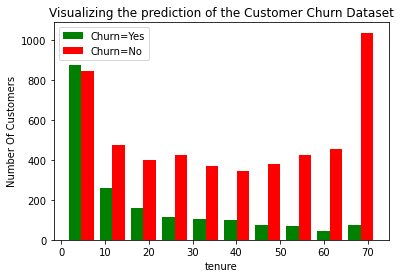

In [25]:
tenure_churn_no=dfNew[dfNew['Churn']== 'No'].tenure
tenure_churn_yes=dfNew[dfNew['Churn']== 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number Of Customers')
plt.title('Visualizing the prediction of the Customer Churn Dataset')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [26]:
for column in df:
    print(f'{column} : {df[column].unique()} ')

gender : ['Female' 'Male'] 
SeniorCitizen : [0 1] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges : [29.85 56.95 53.

In [27]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
             print(f'{column} : {df[column].unique()} ')

In [28]:
print_unique_col_values(dfNew)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [29]:
dfNew.replace('No phone service', 'No', inplace=True)
dfNew.replace('No internet service', 'No', inplace=True)

C:\Users\argha\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
print_unique_col_values(dfNew)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes'] 
OnlineBackup : ['Yes' 'No'] 
DeviceProtection : ['No' 'Yes'] 
TechSupport : ['No' 'Yes'] 
StreamingTV : ['No' 'Yes'] 
StreamingMovies : ['No' 'Yes'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [31]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    dfNew[col].replace({'Yes': 1,'No': 0},inplace=True) #We can pass a dictionary to the 'replace' function as well.

C:\Users\argha\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
for col in dfNew:
    print(f'{col} : {dfNew[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [33]:
 dfNew['gender'].replace({'Female': 1,'Male': 0},inplace=True)

In [34]:
dfNew['gender'].unique()

array([1, 0], dtype=int64)

In [35]:
dfNew2=pd.get_dummies(data=dfNew, columns=['InternetService','Contract','PaymentMethod'])
dfNew2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [36]:
dfNew2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [37]:
dfNew2.shape

(7032, 27)

In [38]:
dfNew2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [39]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

dfNew2[cols_to_scale]=scaler.fit_transform(dfNew2[cols_to_scale])

In [40]:
dfNew2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [41]:
for col in dfNew2:
    print(f'{col} : {dfNew2[col].unique()}')
    

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [42]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

In [43]:
X.shape

(7032, 26)

In [44]:
y.shape

(7032,)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [47]:
X_train.shape

(4922, 26)

In [48]:
y_train.shape

(4922,)

In [49]:
len(X_train.columns)

26

In [50]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


Epoch 1/50
154/154 [==============================] - 12s 8ms/step - loss: 0.4900 - accuracy: 0.7562
Epoch 2/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4270 - accuracy: 0.7918
Epoch 3/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4176 - accuracy: 0.8005
Epoch 4/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4131 - accuracy: 0.8025
Epoch 5/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4111 - accuracy: 0.8046
Epoch 6/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4073 - accuracy: 0.8096
Epoch 7/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4054 - accuracy: 0.8104
Epoch 8/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4043 - accuracy: 0.8080
Epoch 9/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4022 - accuracy: 0.8129
Epoch 10/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4005 - accuracy: 0.812

In [51]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 1s 7ms/step - loss: 0.4797 - accuracy: 0.7739


[0.4797382056713104, 0.7739336490631104]

In [52]:
yp=model.predict(X_test)

In [53]:
yp[:5][0]

array([0.44006807], dtype=float32)

In [54]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
1042    0
3913    0
3397    0
3292    0
4605    0
Name: Churn, Length: 2110, dtype: int64

In [55]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [56]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [57]:
yp[:5]

array([[0.44006807],
       [0.57528305],
       [0.00367938],
       [0.70451856],
       [0.5486034 ]], dtype=float32)

In [58]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [59]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1511
           1       0.64      0.47      0.54       599

    accuracy                           0.77      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.76      0.77      0.76      2110



Text(69.0, 0.5, 'Truth')

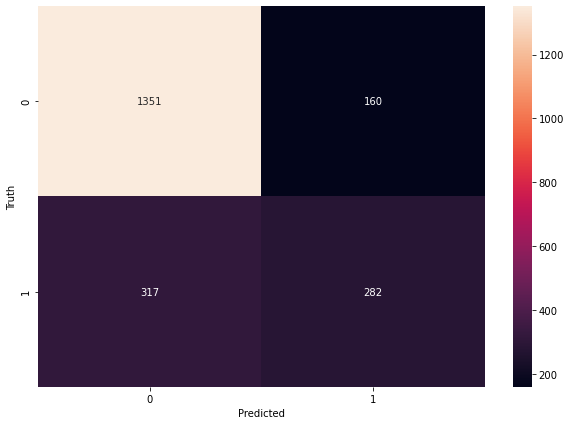

In [60]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Accuracy

In [61]:
round((1334+305)/(1334+177+294+305),2)

0.78

## Precision For 0 class i.e Precision for customers who did not churn

In [62]:
round(1334/(1334+294),2)

0.82

## Precision For 1 class i.e Precision for customers who actually churned

In [63]:
round(305/(305+177),2)

0.63

## Recall for 0 class. Recall is your total Truth

In [64]:
 round(1334/(1334+177),2)

0.88

In [65]:
round(305/(305+177),2)

0.63

# Handling Imbalanced Dataset

## 1) Undersampling

In [66]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),   # This creates the input layer as well as a hidden layer as we are not using the 'keras flatten' functionality.
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
        
    ])
    
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100, class_weight=weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)
    
    print('Classification Report\n', classification_report(y_test,y_preds))
    
    return y_preds

In [67]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
154/154 [==============================] - 3s 11ms/step - loss: 0.4843 - accuracy: 0.7668
Epoch 2/100
154/154 [==============================] - 2s 11ms/step - loss: 0.4256 - accuracy: 0.7976
Epoch 3/100
154/154 [==============================] - 2s 10ms/step - loss: 0.4177 - accuracy: 0.8043
Epoch 4/100
154/154 [==============================] - 2s 10ms/step - loss: 0.4148 - accuracy: 0.8086
Epoch 5/100
154/154 [==============================] - 2s 11ms/step - loss: 0.4108 - accuracy: 0.8098
Epoch 6/100
154/154 [==============================] - 2s 10ms/step - loss: 0.4092 - accuracy: 0.8104
Epoch 7/100
154/154 [==============================] - 2s 11ms/step - loss: 0.4072 - accuracy: 0.8094
Epoch 8/100
154/154 [==============================] - 2s 11ms/step - loss: 0.4048 - accuracy: 0.8100
Epoch 9/100
154/154 [==============================] - 2s 11ms/step - loss: 0.4045 - accuracy: 0.8100
Epoch 10/100
154/154 [==============================] - 2s 10ms/step - loss: 0.402

154/154 [==============================] - 2s 11ms/step - loss: 0.3484 - accuracy: 0.8377
Epoch 81/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3461 - accuracy: 0.8407
Epoch 82/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3463 - accuracy: 0.8440
Epoch 83/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3459 - accuracy: 0.8395
Epoch 84/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3446 - accuracy: 0.8444
Epoch 85/100
154/154 [==============================] - 2s 10ms/step - loss: 0.3446 - accuracy: 0.8407
Epoch 86/100
154/154 [==============================] - 2s 10ms/step - loss: 0.3451 - accuracy: 0.8436
Epoch 87/100
154/154 [==============================] - 2s 10ms/step - loss: 0.3434 - accuracy: 0.8407
Epoch 88/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3430 - accuracy: 0.8417
Epoch 89/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3428 - 

In [68]:
#Count of the Classes
count_class0, count_class1=dfNew2.Churn.value_counts()

In [69]:
count_class0, count_class1

(5163, 1869)

In [70]:
df_class0=dfNew2[dfNew2['Churn'] == 0]
df_class1=dfNew2[dfNew2['Churn'] == 1]

In [71]:
dfNew2.shape

(7032, 27)

In [72]:
df_class0.shape

(5163, 27)

In [73]:
df.shape

(7043, 20)

In [74]:
df_class1.shape

(1869, 27)

In [75]:
df_class0.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5620,0,0,1,0,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
951,1,0,0,0,0.098592,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6673,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
77,1,0,1,1,0.098592,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3398,1,0,1,1,0.845070,1,1,1,1,1,...,0,1,0,0,1,0,0,1,0,0


In [76]:
df_class1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1575,0,0,0,0,0.915493,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2415,1,1,1,1,0.549296,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3357,1,0,0,1,0.000000,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
687,0,1,0,0,0.014085,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1670,0,1,0,1,0.000000,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [77]:
df_class0.shape

(5163, 27)

In [78]:
df_class1.shape

(1869, 27)

In [79]:
df_class0.sample(count_class1).shape

(1869, 27)

In [80]:
df_class0_under=df_class0.sample(count_class1)

df_test_under=pd.concat([df_class0_under,df_class1], axis=0)
df_test_under.shape

(3738, 27)

In [81]:
print(df_test_under.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [82]:
X=df_test_under.drop('Churn', axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y) # 'stratify' will make sure that it has balanced samples as it as class0 values and class1 values. It makes sure that same amount of values are present from both the class in the training and the test samples for balanced training of the model.

In [83]:
y_train.value_counts()

0    1308
1    1308
Name: Churn, dtype: int64

In [84]:
y_test.value_counts()

0    561
1    561
Name: Churn, dtype: int64

In [85]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
82/82 [==============================] - 1s 9ms/step - loss: 0.6534 - accuracy: 0.6269
Epoch 2/100
82/82 [==============================] - 0s 6ms/step - loss: 0.5317 - accuracy: 0.7424
Epoch 3/100
82/82 [==============================] - 0s 6ms/step - loss: 0.5043 - accuracy: 0.7584
Epoch 4/100
82/82 [==============================] - 0s 6ms/step - loss: 0.4960 - accuracy: 0.7645
Epoch 5/100
82/82 [==============================] - 0s 6ms/step - loss: 0.4903 - accuracy: 0.7676
Epoch 6/100
82/82 [==============================] - 0s 6ms/step - loss: 0.4890 - accuracy: 0.7695
Epoch 7/100
82/82 [==============================] - 0s 6ms/step - loss: 0.4861 - accuracy: 0.7699
Epoch 8/100
82/82 [==============================] - 0s 6ms/step - loss: 0.4849 - accuracy: 0.7699
Epoch 9/100
82/82 [==============================] - 1s 9ms/step - loss: 0.4820 - accuracy: 0.7676
Epoch 10/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4819 - accuracy: 0.7687
Epoch 11

82/82 [==============================] - 1s 12ms/step - loss: 0.4030 - accuracy: 0.8146
Epoch 82/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4022 - accuracy: 0.8188
Epoch 83/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4007 - accuracy: 0.8150
Epoch 84/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4009 - accuracy: 0.8169
Epoch 85/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4026 - accuracy: 0.8188
Epoch 86/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3995 - accuracy: 0.8142
Epoch 87/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3985 - accuracy: 0.8184
Epoch 88/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3988 - accuracy: 0.8165
Epoch 89/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3969 - accuracy: 0.8200
Epoch 90/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3949 - accuracy: 0.8226
Epo

## 2) Oversampling

In [86]:
count_class0, count_class1

(5163, 1869)

In [87]:
count_class0, count_class1

(5163, 1869)

In [88]:
df_class1_over=df_class1.sample(count_class0, replace=True)
df_class1_over.shape

(5163, 27)

In [89]:
df_test_over=pd.concat([df_class1_over,df_class0], axis=0)

df_test_over['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [90]:
X=df_test_under.drop('Churn', axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y)

In [91]:
y_train.value_counts()

0    1308
1    1308
Name: Churn, dtype: int64

In [92]:
y_preds_over=ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
82/82 [==============================] - 2s 11ms/step - loss: 0.6240 - accuracy: 0.6709
Epoch 2/100
82/82 [==============================] - 1s 10ms/step - loss: 0.5294 - accuracy: 0.7557
Epoch 3/100
82/82 [==============================] - 1s 10ms/step - loss: 0.5039 - accuracy: 0.7649
Epoch 4/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4946 - accuracy: 0.7661
Epoch 5/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4907 - accuracy: 0.7699
Epoch 6/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4850 - accuracy: 0.7672
Epoch 7/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4823 - accuracy: 0.7664
Epoch 8/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4791 - accuracy: 0.7752
Epoch 9/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4744 - accuracy: 0.7779
Epoch 10/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4712 - accuracy: 0.7775

82/82 [==============================] - 1s 13ms/step - loss: 0.3924 - accuracy: 0.8219
Epoch 83/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3924 - accuracy: 0.8192
Epoch 84/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3892 - accuracy: 0.8177
Epoch 85/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3885 - accuracy: 0.8207
Epoch 86/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3889 - accuracy: 0.8215
Epoch 87/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3899 - accuracy: 0.8238
Epoch 88/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3869 - accuracy: 0.8200
Epoch 89/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3894 - accuracy: 0.8173
Epoch 90/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3868 - accuracy: 0.8192
Epoch 91/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3844 - accuracy: 0.8257
Epo

## 3) Smote

In [93]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

In [94]:
# pip install imbalanced-Learn
from imblearn.over_sampling import SMOTE

In [95]:
smote=SMOTE(sampling_strategy='minority')
X_sm, y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_sm,y_sm,test_size=0.3, random_state=15, stratify=y_sm)

In [97]:
y_train.value_counts()

0    3614
1    3614
Name: Churn, dtype: int64

In [98]:
y_preds_smote=ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
226/226 [==============================] - 2s 6ms/step - loss: 0.5330 - accuracy: 0.7464
Epoch 2/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4719 - accuracy: 0.7753
Epoch 3/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4627 - accuracy: 0.7796
Epoch 4/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4571 - accuracy: 0.7818
Epoch 5/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4545 - accuracy: 0.7828
Epoch 6/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4504 - accuracy: 0.7892
Epoch 7/100
226/226 [==============================] - 2s 7ms/step - loss: 0.4460 - accuracy: 0.7885
Epoch 8/100
226/226 [==============================] - 2s 10ms/step - loss: 0.4416 - accuracy: 0.7947
Epoch 9/100
226/226 [==============================] - 2s 10ms/step - loss: 0.4375 - accuracy: 0.7937
Epoch 10/100
226/226 [==============================] - 2s 10ms/step - loss: 0.4360 - acc

Epoch 80/100
226/226 [==============================] - 2s 11ms/step - loss: 0.3381 - accuracy: 0.8531
Epoch 81/100
226/226 [==============================] - 2s 11ms/step - loss: 0.3382 - accuracy: 0.8506
Epoch 82/100
226/226 [==============================] - 2s 11ms/step - loss: 0.3383 - accuracy: 0.8527
Epoch 83/100
226/226 [==============================] - 3s 11ms/step - loss: 0.3398 - accuracy: 0.8522
Epoch 84/100
226/226 [==============================] - 2s 11ms/step - loss: 0.3383 - accuracy: 0.8502
Epoch 85/100
226/226 [==============================] - 3s 11ms/step - loss: 0.3376 - accuracy: 0.8480
Epoch 86/100
226/226 [==============================] - 2s 11ms/step - loss: 0.3354 - accuracy: 0.8511
Epoch 87/100
226/226 [==============================] - 2s 11ms/step - loss: 0.3356 - accuracy: 0.8499
Epoch 88/100
226/226 [==============================] - 3s 11ms/step - loss: 0.3349 - accuracy: 0.8578
Epoch 89/100
226/226 [==============================] - 3s 12ms/step - lo

## 4)Use of Ensemble with undersampling

In [99]:
dfNew2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [100]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

In [101]:
X.shape

(7032, 26)

In [102]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [103]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y)

In [104]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [105]:
df3=X_train.copy()
df3['Churn']=y_train

In [106]:
df3_class0=df3[df3.Churn ==0]
df3_class1=df3[df3.Churn ==1]

In [107]:
df3_class0.shape, df3_class1.shape

((3614, 27), (1308, 27))

In [108]:
def get_train_batch(df_majority, df_minority, start,end):
    df_train=pd.concat([df_majority[start:end], df_minority], axis=0)
    
    X_train=df_train.drop('Churn', axis='columns')
    y_train=df_train.Churn
    
    return X_train,y_train

In [109]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1308) #'1308' since it the minority count and were are divinding the majority count with this number.

In [110]:
X_train.shape,y_train.shape

((2616, 26), (2616,))

In [111]:
y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
82/82 [==============================] - 2s 14ms/step - loss: 0.6183 - accuracy: 0.6789
Epoch 2/100
82/82 [==============================] - 1s 14ms/step - loss: 0.5296 - accuracy: 0.7519
Epoch 3/100
82/82 [==============================] - 1s 15ms/step - loss: 0.5084 - accuracy: 0.7603
Epoch 4/100
82/82 [==============================] - 1s 13ms/step - loss: 0.4996 - accuracy: 0.7588
Epoch 5/100
82/82 [==============================] - 1s 13ms/step - loss: 0.4935 - accuracy: 0.7565
Epoch 6/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4894 - accuracy: 0.7569
Epoch 7/100
82/82 [==============================] - 1s 13ms/step - loss: 0.4859 - accuracy: 0.7672
Epoch 8/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4828 - accuracy: 0.7638
Epoch 9/100
82/82 [==============================] - 1s 14ms/step - loss: 0.4794 - accuracy: 0.7634
Epoch 10/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4774 - accuracy: 0.7672

82/82 [==============================] - 1s 11ms/step - loss: 0.3977 - accuracy: 0.8093
Epoch 83/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3982 - accuracy: 0.8115
Epoch 84/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3978 - accuracy: 0.8112
Epoch 85/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3953 - accuracy: 0.8169
Epoch 86/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3950 - accuracy: 0.8169
Epoch 87/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3935 - accuracy: 0.8219
Epoch 88/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3933 - accuracy: 0.8165
Epoch 89/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3928 - accuracy: 0.8180
Epoch 90/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3890 - accuracy: 0.8154
Epoch 91/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3908 - accuracy: 0.8161
Epo

In [112]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,1308,2616)
y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
82/82 [==============================] - 2s 13ms/step - loss: 0.5910 - accuracy: 0.7018
Epoch 2/100
82/82 [==============================] - 1s 13ms/step - loss: 0.5052 - accuracy: 0.7699
Epoch 3/100
82/82 [==============================] - 1s 13ms/step - loss: 0.4931 - accuracy: 0.7691
Epoch 4/100
82/82 [==============================] - 1s 13ms/step - loss: 0.4879 - accuracy: 0.7680
Epoch 5/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4815 - accuracy: 0.7729
Epoch 6/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4780 - accuracy: 0.7756
Epoch 7/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4765 - accuracy: 0.7745
Epoch 8/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4721 - accuracy: 0.7729
Epoch 9/100
82/82 [==============================] - 1s 13ms/step - loss: 0.4691 - accuracy: 0.7756
Epoch 10/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4689 - accuracy: 0.7756

82/82 [==============================] - 1s 12ms/step - loss: 0.3792 - accuracy: 0.8352
Epoch 83/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3797 - accuracy: 0.8276
Epoch 84/100
82/82 [==============================] - 1s 14ms/step - loss: 0.3762 - accuracy: 0.8280
Epoch 85/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3768 - accuracy: 0.8345
Epoch 86/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3749 - accuracy: 0.8310
Epoch 87/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3749 - accuracy: 0.8341
Epoch 88/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3746 - accuracy: 0.8330
Epoch 89/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3727 - accuracy: 0.8379
Epoch 90/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3790 - accuracy: 0.8238
Epoch 91/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3732 - accuracy: 0.8303
Epo

In [113]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,2616,3614)
y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
73/73 [==============================] - 2s 12ms/step - loss: 0.7097 - accuracy: 0.5100
Epoch 2/100
73/73 [==============================] - 1s 12ms/step - loss: 0.6329 - accuracy: 0.6930
Epoch 3/100
73/73 [==============================] - 1s 11ms/step - loss: 0.5832 - accuracy: 0.7550
Epoch 4/100
73/73 [==============================] - 1s 12ms/step - loss: 0.5320 - accuracy: 0.7628
Epoch 5/100
73/73 [==============================] - 1s 12ms/step - loss: 0.5019 - accuracy: 0.7559
Epoch 6/100
73/73 [==============================] - 1s 12ms/step - loss: 0.4876 - accuracy: 0.7658
Epoch 7/100
73/73 [==============================] - 1s 12ms/step - loss: 0.4831 - accuracy: 0.7719
Epoch 8/100
73/73 [==============================] - 1s 12ms/step - loss: 0.4806 - accuracy: 0.7758
Epoch 9/100
73/73 [==============================] - 1s 13ms/step - loss: 0.4787 - accuracy: 0.7689
Epoch 10/100
73/73 [==============================] - 1s 12ms/step - loss: 0.4751 - accuracy: 0.7784

73/73 [==============================] - 1s 11ms/step - loss: 0.4033 - accuracy: 0.8153
Epoch 83/100
73/73 [==============================] - 1s 12ms/step - loss: 0.4011 - accuracy: 0.8231
Epoch 84/100
73/73 [==============================] - 1s 11ms/step - loss: 0.4044 - accuracy: 0.8174
Epoch 85/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3998 - accuracy: 0.8239
Epoch 86/100
73/73 [==============================] - 1s 11ms/step - loss: 0.4010 - accuracy: 0.8231
Epoch 87/100
73/73 [==============================] - 1s 13ms/step - loss: 0.3989 - accuracy: 0.8248
Epoch 88/100
73/73 [==============================] - 1s 13ms/step - loss: 0.4002 - accuracy: 0.8226
Epoch 89/100
73/73 [==============================] - 1s 11ms/step - loss: 0.3977 - accuracy: 0.8192
Epoch 90/100
73/73 [==============================] - 1s 11ms/step - loss: 0.3938 - accuracy: 0.8287
Epoch 91/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3989 - accuracy: 0.8153
Epo

## If total vote is more then 1 then the output/vote is for class 1 otherwise it is for class 0.

In [114]:
len(y_pred1)

2110

In [115]:
len(y_pred2)

2110

In [116]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i] + y_pred2[i] + y_pred3[i]
    
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [117]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76      1549
           1       0.47      0.83      0.60       561

    accuracy                           0.70      2110
   macro avg       0.69      0.74      0.68      2110
weighted avg       0.79      0.70      0.72      2110



# Exercise
## Handling Imbalanced Dataset with Sklearn Logistic regression

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
def reg(X_train,y_train,X_test,y_test,loss):
    model=LogisticRegression()
    
    model.fit(X_train,y_train)
    
    print(model.score(X_test,y_test))
    
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)
    
    print('Classification Report\n', classification_report(y_test,y_preds))
    
    return y_preds

In [161]:
dfNew2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [162]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y)

In [163]:
X.shape

(7032, 26)

In [164]:
X_train.shape

(4922, 26)

In [165]:
y_train.shape

(4922,)

In [166]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [167]:
y_pred_log=reg(X_train,y_train,X_test,y_test,'binary_crossentropy')

0.7985781990521327
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



## 1)Undersampling with Logistic Regression

In [168]:
count_class0, count_class1=dfNew2.Churn.value_counts()

In [169]:
count_class0, count_class1

(5163, 1869)

In [170]:
df_class0=dfNew2[dfNew2['Churn'] ==0]
df_class1=dfNew2[dfNew2['Churn'] ==1]

In [171]:
df_class0.shape, df_class1.shape

((5163, 27), (1869, 27))

In [172]:
df_class0.sample(count_class1).shape

(1869, 27)

In [173]:
df_class0_under=df_class0.sample(count_class1)
df_under=pd.concat([df_class0_under, df_class1])

In [174]:
df_class0_under.shape

(1869, 27)

In [175]:
df_under.shape

(3738, 27)

In [176]:
X=df_under.drop('Churn', axis='columns')
y=df_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y)

In [177]:
X_train.shape

(2616, 26)

In [178]:
y_train.shape

(2616,)

In [179]:
y_train.value_counts()

0    1308
1    1308
Name: Churn, dtype: int64

In [180]:
y_pred_log_under=reg(X_train,y_train,X_test,y_test,'binary_crossentropy')

0.7468805704099821
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.70      0.73       561
           1       0.73      0.80      0.76       561

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



## 2)Oversampling with Logistic Regression

In [192]:
count_class0, count_class1

(5163, 1869)

In [193]:
df_class0=dfNew2[dfNew2['Churn'] ==0]
df_class1=dfNew2[dfNew2['Churn'] ==1]

In [194]:
df_class0.shape, df_class1.shape

((5163, 27), (1869, 27))

In [195]:
df_class1.sample(count_class0, replace=True).shape

(5163, 27)

In [197]:
df_class1_over=df_class1.sample(count_class0, replace=True)
df_over=pd.concat([df_class1_over, df_class0], axis=0)

In [199]:
df_over.shape

(10326, 27)

In [200]:
X=df_over.drop('Churn', axis='columns')
y=df_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y)

In [201]:
X_train.shape

(7228, 26)

In [202]:
y_train.shape

(7228,)

In [203]:
y_train.value_counts()

0    3614
1    3614
Name: Churn, dtype: int64

In [204]:
y_pred_log_over=reg(X_train,y_train,X_test,y_test,'binary_crossentropy')

0.7811491284699806
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      1549
           1       0.76      0.83      0.79      1549

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



## 3) Oversampling using SMOTE with Logistic Regression

In [205]:
count_class0, count_class1

(5163, 1869)

In [206]:
df_class0=dfNew2[dfNew2['Churn'] ==0]
df_class1=dfNew2[dfNew2['Churn'] ==1]

In [207]:
df_class0.shape, df_class1.shape

((5163, 27), (1869, 27))

In [208]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

In [209]:
from imblearn.over_sampling import SMOTE

In [210]:
smote=SMOTE(sampling_strategy='minority')
X_sm, y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_sm,y_sm,test_size=0.3, random_state=15, stratify=y_sm)

In [212]:
y_train.value_counts()

0    3614
1    3614
Name: Churn, dtype: int64

In [213]:
y_pred_log_smote=reg(X_train,y_train,X_test,y_test,'binary_crossentropy')

0.8018076178179471
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      1549
           1       0.79      0.83      0.81      1549

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



## 4) Ensemble with Logistic Regression

In [214]:
dfNew2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [216]:
X = dfNew2.drop('Churn',axis='columns')
y = dfNew2['Churn']

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [218]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [219]:
model = LogisticRegression()

df3 = X_train.copy()
df3['Churn'] = y_train

In [220]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
66,0,0,1,0,0.647887,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
5641,0,0,0,1,0.535211,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3453,1,0,1,0,0.971831,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2121,0,0,0,0,0.000000,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
6283,1,0,0,0,0.028169,1,0,1,0,1,...,1,0,1,0,0,0,1,0,0,1


In [221]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [223]:
df3_class0.shape, df3_class1.shape

((3614, 27), (1308, 27))

In [224]:
def ensemble_batch_reg(df_majority, df_minority, start,end):
    df_train=pd.concat([df_majority[start: end], df_minority], axis=0)
    X_train= df_train.drop('Churn', axis='columns')
    y_train=df_train['Churn']
    
    return X_train, y_train

In [225]:
X_train, y_train= ensemble_batch_reg(df3_class0, df3_class1, 0,1308)

model1= LogisticRegression()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)

In [226]:
X_train, y_train= ensemble_batch_reg(df3_class0, df3_class1, 1308,2616)

model2= LogisticRegression()
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)

In [227]:
X_train, y_train= ensemble_batch_reg(df3_class0, df3_class1, 2616,3614)

model3= LogisticRegression()
model3.fit(X_train, y_train)
y_pred3=model3.predict(X_test)

In [228]:
len(y_pred1)

2110

In [229]:
len(y_pred2)

2110

In [230]:
len(y_pred3)

2110

In [231]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [232]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

